In [173]:
import pandas as pd

# index_col: column to use as the row label of DataFrame
# parse_dates: list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
df = pd.read_csv('../input/ts-course-data/book_sales.csv',index_col='Date',parse_dates=['Date'])
#  Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.
df = df.drop('Paperback',axis=1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


## Time Step Features

In [174]:
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

## Model Time Dependency

Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

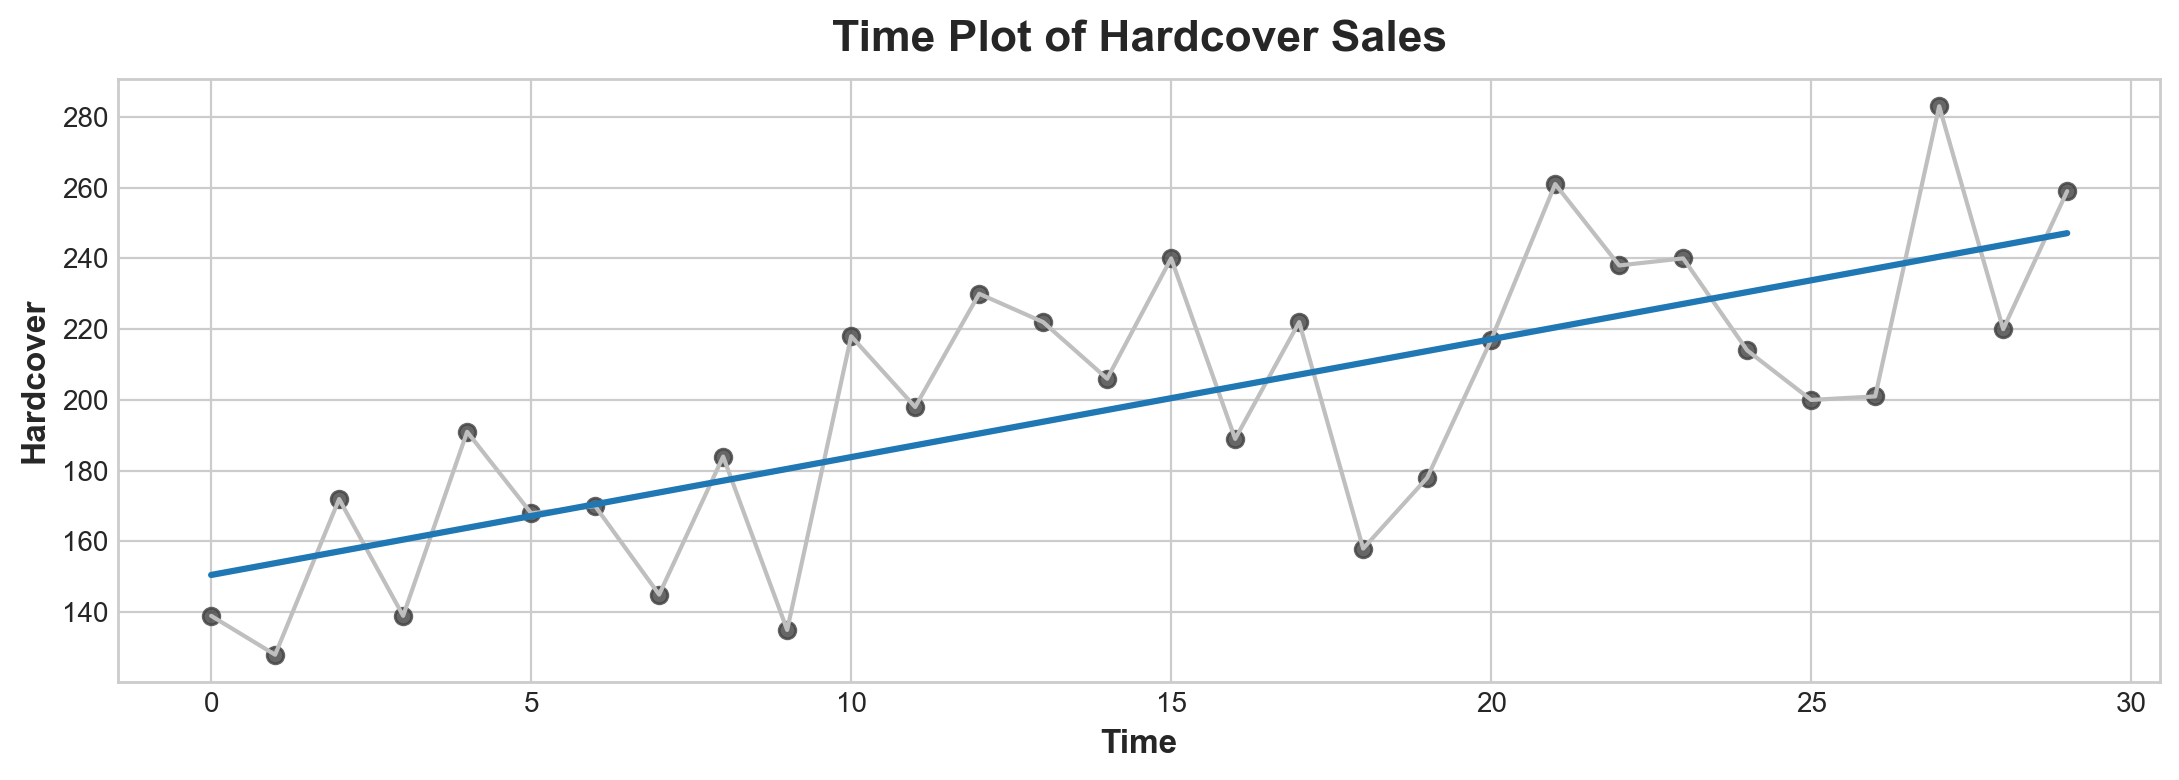

In [176]:
fig, ax = plt.subplots()
ax.plot('Time','Hardcover',data=df,color='0.75')    # Additional keyword arguments to pass to ``plt.scatter``
# ax = sns.regplot(data=df,x='Time',y='Hardcover',ci=None,scatter_kws={'color':'0.25'}) # Two different ways of forming a dict
ax = sns.regplot(data=df,x='Time',y='Hardcover',ci=None,scatter_kws=dict(color='0.25'))
# ax.set_title('Time Plot of hardcover sales')
ax.set_title('Time Plot of Hardcover Sales')

## Lag Features

In [177]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover','Lag_1'])  # Conform Series/DataFrame to new index with optional filling logic.
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


## Model Serial Dependency

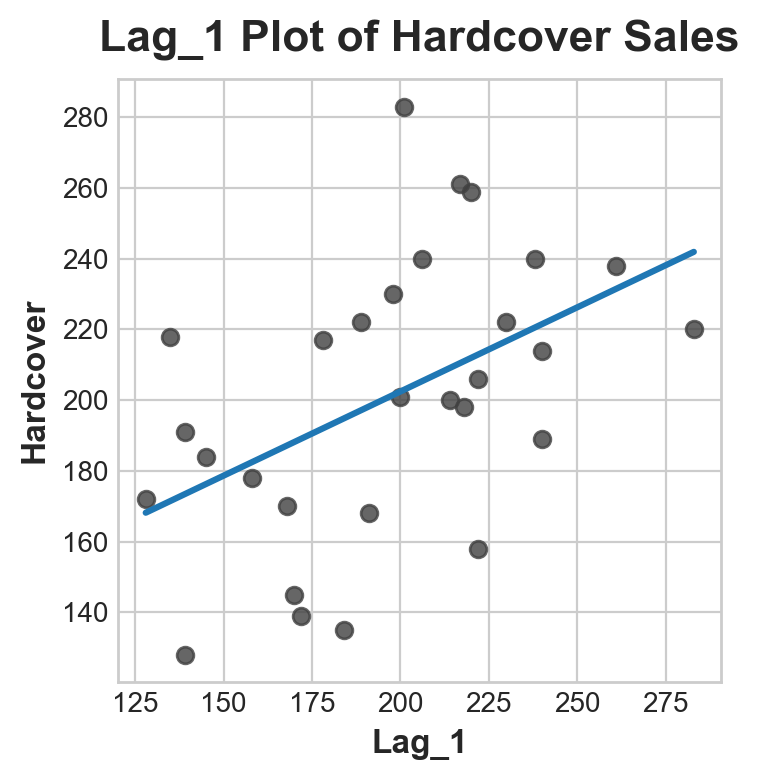

In [178]:
fig, ax = plt.subplots()
# ax.plot('Hardcover','Lag_1','o',data=df,color='0.75')
ax = sns.regplot(data=df,x='Lag_1',y='Hardcover',ci=None,scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag_1 Plot of Hardcover Sales')
fig.savefig('Lag_1 Plot of Hardcover Sales.jpg')

# Example: Tunnel Traffic

In [179]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv",index_col="Day", parse_dates=["Day"])

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period() # Convert DataFrame from DatetimeIndex to PeriodIndex with desired frequency

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [180]:
df = tunnel.copy()
df['Time'] = np.arange(len(df.index))
df['Time_squre'] = df['Time'] ** 2
df.head()

,NumVehicles,Time,Time_squre
Day,,,
2003-11-01,103536,0,0
2003-11-02,92051,1,1
2003-11-03,100795,2,4
2003-11-04,102352,3,9
2003-11-05,106569,4,16


In [181]:
from sklearn.linear_model import LinearRegression

X = df.loc[:,['Time','Time_squre']] # features
y = df.loc[:,'NumVehicles']
model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X),index=X.index)


Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

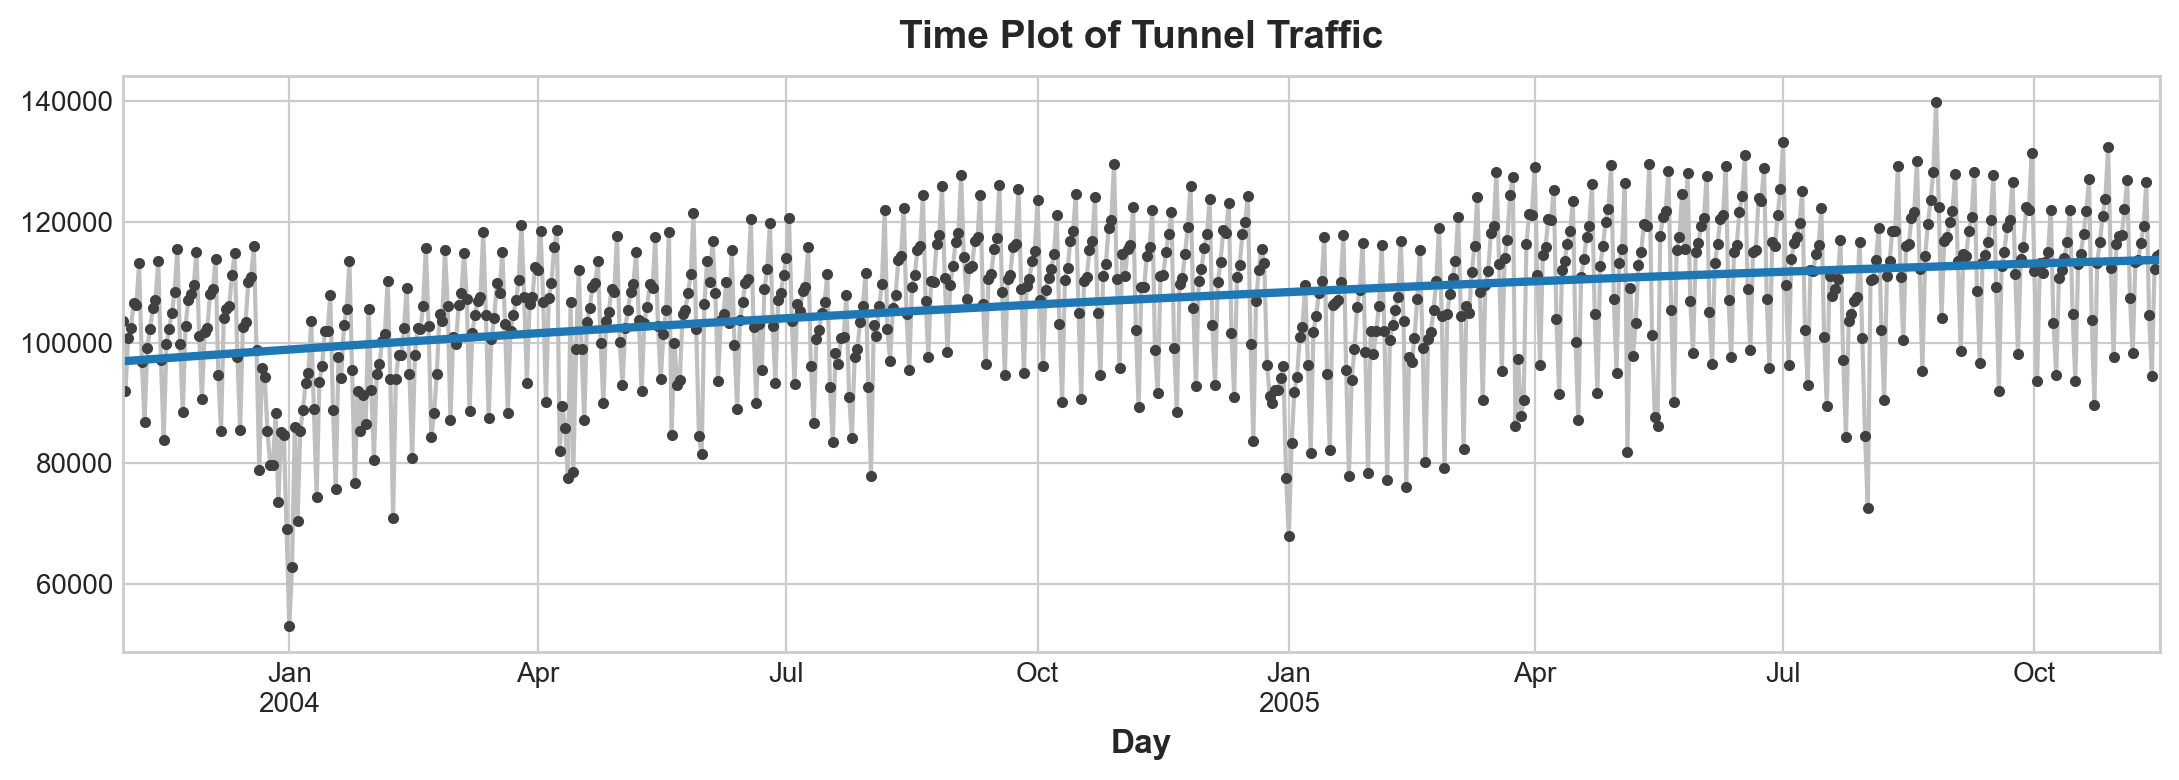

In [182]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax,linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

In [183]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Time_squre,Lag_1
Day,,,,
2003-11-01,103536,0,0,NaN
2003-11-02,92051,1,1,103536.0
2003-11-03,100795,2,4,92051.0
2003-11-04,102352,3,9,100795.0
2003-11-05,106569,4,16,102352.0


In [184]:
X = df.loc[:,['Lag_1']]
X.dropna(inplace=True)
type(X)

pandas.core.frame.DataFrame

In [185]:
y = df.loc[:,'NumVehicles']
len(y)

747

In [186]:
y,X = y.align(X,join='inner')

In [187]:
model = LinearRegression()
model.fit(X,y)
y_pred = pd.Series(model.predict(X),index=X.index)

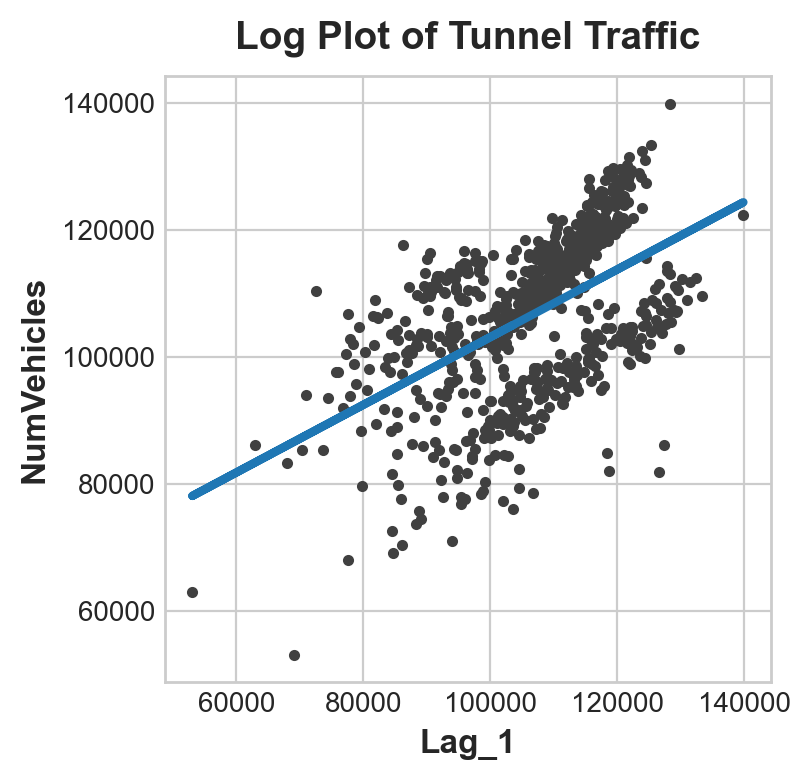

In [188]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'],y,'.',color='0.25')
ax.plot(X['Lag_1'],y_pred, linewidth=3)
ax.set_aspect('equal')
ax.set_xlabel('Lag_1')
ax.set_ylabel('NumVehicles')
ax.set_title('Log Plot of Tunnel Traffic');

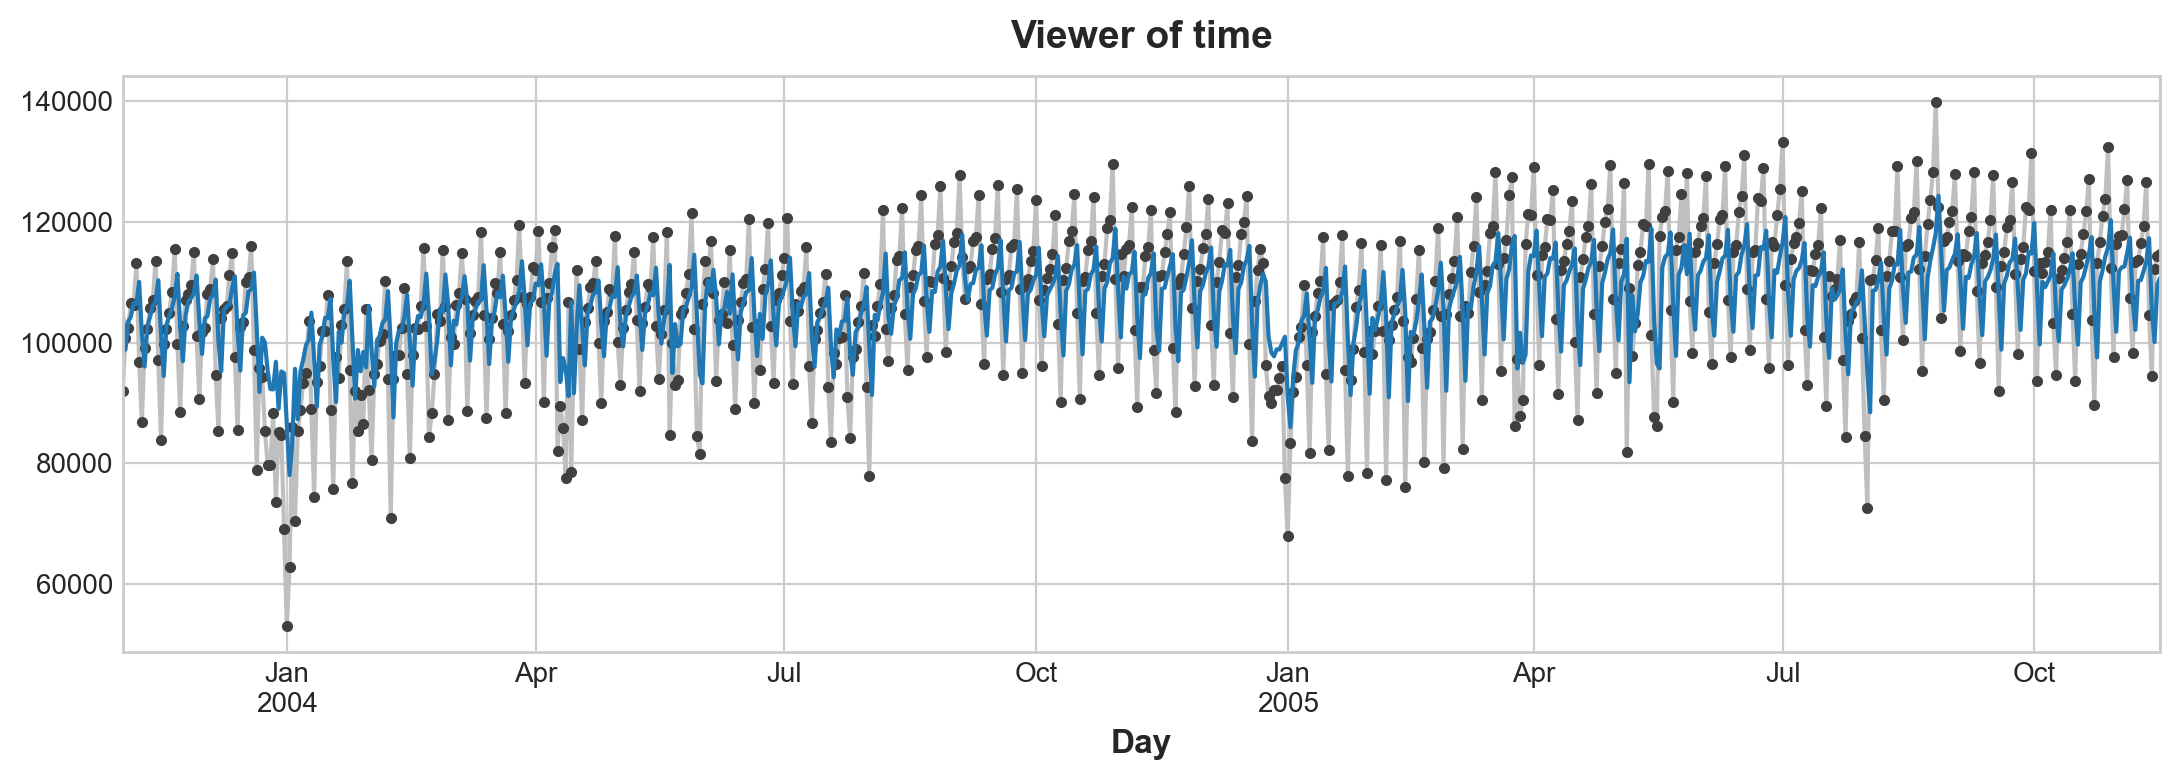

In [189]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax)
ax.set_title('Viewer of time');